# Jegyzőkönyv 3 számolások

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import logic
from schemdraw.parsing import logicparse
from sympy import symbols, Not, Or, And
from sympy.logic.boolalg import simplify_logic

In [3]:
def logic_form_print(formula) -> None:
    print(str(formula).upper().replace("|", "∪").replace("&", "∩").replace(" ", ""))

## 1. feladat: 2 bites komparátor

Áramkör teljesen megtervezve, bemutatni csak az egyenlőség részt kell.

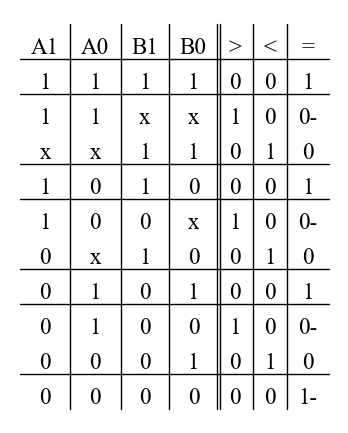

In [4]:
a1, a0, b1, b0 = symbols('a1,a0,b1,b0')

truth_table = """
A1|A0|B1|B0| >| <| =
---------------------
1 | 1| 1| 1| 0| 0| 1
---------------------
1 | 1| x| x| 1| 0| 0-
x | x| 1| 1| 0| 1| 0
---------------------
1 | 0| 1| 0| 0| 0| 1
---------------------
1 | 0| 0| x| 1| 0| 0-
0 | x| 1| 0| 0| 1| 0
---------------------
0 | 1| 0| 1| 0| 0| 1
---------------------
0 | 1| 0| 0| 1| 0| 0-
0 | 0| 0| 1| 0| 1| 0
---------------------
0 | 0| 0| 0| 0| 0| 1-
"""

logic.Table(truth_table, colfmt='c|c|c|c||c|c|c', fontsize=18, font="times new roman")

### `=` kimenet logikai egyszerűsítés

= minterm:
(A0∩A1∩B0∩B1)∪(A0∩B0∩~A1∩~B1)∪(A1∩B1∩~A0∩~B0)∪(~A0∩~A1∩~B0∩~B1)
Simplified:
(A0∪~B0)∩(A1∪~B1)∩(B0∪~A0)∩(B1∪~A1)


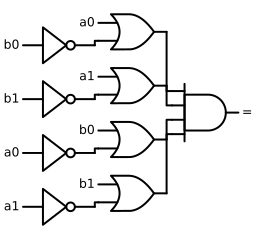

In [5]:
equivalence_equation = (a1 & a0 & b1 & b0) \
    | (~a1 & a0 & ~b1 & b0) \
    | (a1 & ~a0 & b1 & ~b0) \
    | (~a1 & ~a0 & ~b1 & ~b0)

print("= minterm:")
logic_form_print(equivalence_equation)

simplified_equivalence = simplify_logic(equivalence_equation)
print("Simplified:")
logic_form_print(simplified_equivalence)
logicparse(str(simplified_equivalence), outlabel="=")

### `>` kimenet logikai egyszerűsítés

> minterm:
(a1 & ~a0 & ~b1) | (a0 & a1 & ~(b0 & b1)) | (a0 & ~a1 & ~b0 & ~b1)
> simplified:
(a0 | a1) & (a0 | ~b1) & (a1 | ~b0) & (a1 | ~b1) & (~b0 | ~b1)


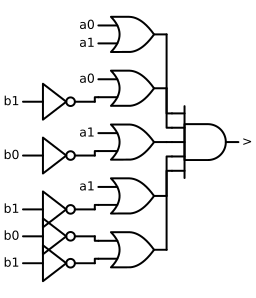

In [6]:
bigger_equation = (a1 & a0 & ~(b1 & b0)) \
    | (a1 & ~a0 & ~b1) \
    | (~a1 & a0 & ~b1 & ~b0)

print("> minterm:")
print(bigger_equation)

simplified_bigger = simplify_logic(bigger_equation)
print("> simplified:")
print(simplified_bigger)
logicparse(str(simplified_bigger), outlabel=">")

### `<` kimenet logikai egyszerűsítés

< minterm:
(b1 & ~a1 & ~b0) | (b0 & b1 & ~(a0 & a1)) | (b0 & ~a0 & ~a1 & ~b1)
< simplified:
(b0 | b1) & (b0 | ~a1) & (b1 | ~a0) & (b1 | ~a1) & (~a0 | ~a1)


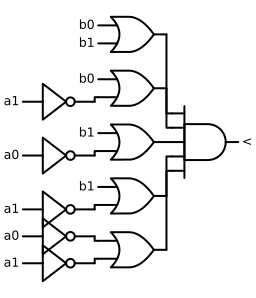

In [7]:
bigger_equation = (b1 & b0 & ~(a1 & a0)) \
    | (b1 & ~b0 & ~a1) \
    | (~b1 & b0 & ~a1 & ~a0)

print("< minterm:")
print(bigger_equation)

simplified_bigger = simplify_logic(bigger_equation)
print("< simplified:")
print(simplified_bigger)
logicparse(str(simplified_bigger), outlabel="<")

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat1.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJwm8Gvjz7FCUMQDMAhgBsAzg2qROIbCn59VIEWKpS5CpEq5UwAsdqq6Z8xcqabTgzRYnWDUNgA9uGUXkE05HjkfCh8AILs3kxmBNxgSHhIoRFK0WBqePRgQaIpIABCUSBoIP60xGUhJXwFSglqOaJgxGpoeOCtYmpICGwJVCh4HS1qqiZdVHy9bACS6iX44L6LHZbQMwCyKoQjZti7WqKDG2zbNHALF1QuKKfnDmZ0aren3gcQWCoYiVM1IAAdACOXloKHoXzoQT+YRAAB5QdgupDIH4YXwAHxzBaYRorXE6DYUfoIPGiFAIclLCnHErUPrzRwqA7LUTYFnrGYNVkqUrtXmWOkzRlPS5NWiXTnE7ni7DlflyviDelsADuPPF9jJHnVWp5eqZSnVjw0bSWRt5qxx5rVVtGJVh9otKEdhEGjsmtpdfDAbpKw3AfudFx5QxGK2Dg0pVppOpK0f5sfGcaTfKWyedGDasIJipTWZU8thecz2dCAe9cfFYSoQhqlltdZr3F4CwtJjMgwL7ZKBaZBItmgVY0gSttmlwPpWk7jBpWevZx0bE5ZTMXca7aioBzWtu3h1lhwtTZDdeus9b56Z58j8fJIfFzoT1IrNplKwEHX5n+6Yj66vFZ4Wz4IDj0vTQz0lZcxhZPUaFbY9NHgqc8gQklBgDSlt1KLC-z-ccDy6ZMnQIkYiIPTsvUwoZex6GjSwoGiCR-Bif2-Ghd3VSs8wVcp6lJHkEAyK0hK3IViRFaYaPFUk1igIkGQWBAuhkyZ5K5ASZPxJYEAjcTFKZQho3FIzaRgDTtV4QYlis39hQWLMTBWRzCQsnkMFHK0PKVfTsUMgMTIDKU+m8UoaC6cKKmSf46lBFg1HCiAcgqECYuKGIQOIWsEgqeh8nCNIfDyLoYhCYhothSJoNoVs4IsarwuaD96uNEdTUYziROE2NRJTaNep6yiuP6swwwoIbgIoP0ZKDcc6I6TRlK3OaKBUswlo3HY5NkzadqZHawOmP0z00Q6ptrVtCFhM6rpQkBbt2+j7ujHtTIWN7nR0-EQ10pcuJ+76qFw29cLG4GvRskNY1sp9RFsnqIy9fr8UwxGuKWbzaJATGGMxgkNoYjawc9dUqA++6gr3Cm9j4XZOsWoi1BcwcmdKJlmdtK9RSB2b1XPXDk3BvmTVoTRhgbYXMjwbCqHF-MXm6gNiGEhiwEgHMC2V5b0ZGdXQj7PW+r8bQxrwFq7yOKNjb+q0RCty2UxDOXTelx3ZZNp3Xc+jozfvd2bdjPBW1NtDhr8IdoyDscdbKCPw+WyTkCWcU1fNdTpU0lY1ZzZPDeVeymTVh8s9HQVzIz7U7dtoNfMTsgmtEevXIrnlfatNv84khYtZ5Hvgr82IONbof+-feP29O3yuILXwvwxo8vQLfwvxnheuIDZesc3-iMJ913kzloH8LH7HDn5WffyBuKMA6DB4O4SK78qfL0vvu-BGSu-qkqwqWD4O+kA5Tvh0fIRRQRgFvvfQI2NIqgJZtjUomgfja0tMg9yAkLTihvj5bBm1cFk0pq1bGAkxa+jjKQhuZQyE3VhHWbejZWybyZPQ0m2M+JlC9lTOW4pD62iZD3OsfcGHCGEnQkeXCvZaAmjcMw4piATX4fOZwaNuDKNEHVG2gjRGtiLhLSauiFgGMQi8JRjQ4CdQNOYwxVilBAA)

## 2. feladat: Digitális kulcs lakat

Egy 4 bites kulcsot ellenőrzünk le, hogy a nálunk tárolt 4 bites kulccsal eggyezik-e.

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat2.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJwm8Gvjz7FCUMQDMAhgBsAzg2qROIbCn59VIEWIhS5CpEq5UwAsdpMg98xcqabTgzRYkybhtgA9uGUXkE05HjkfCh8ANLYXtxmBNxgSHhIoREo0SxqePRgQaIpIOHs3mgg-rTEpSEgYQVKALIqhHjqjc0uKNAIbA00YKKOtH1aolQdXd7YhBBYKjN4VPkAotE0kNMh2IkL1XwA8uHRKGCZKRDBtDsgAMpK3mDzpfRoFXh5l1dF-M1xOUHJ72k7kMyqZElUalcolw+iYzDDhmIqNYDFBlGBiGoBui1C4kW4UUZqjUBigarirPjbNCUM0sTSEVQ8fpbAkFs1VGyVAg1NsqF0AO6lUZ4b5UXB8JSCh7ikC8FSQCVsQVymUqkqSoUqEoDDmowU67VmGnNDVDY3gUQy02WhVa+WKwWaGVO9VKi1aqhMGjs12Cr0+z3e6oivXcOUDIQ7Rlu460uH0tAmmMJ-DcTSJ0P2NQZrNRzMOMy57H5zEYnRljUmCt5ystEy+UP10ThhsalvNlLRx2YsxBgamhPEhOrUPwrGEKs8mMT8BlhwVt3ztTpkca7RhKjaHIjN1bhvF7ejsuHg9ma2jEfwjPn6qp0mhVMa++35rP-tuoOTdlNVqh3qWn9-zrNgAElf02Zcf11RlOgoRcoIQ9luVDL9fyA1CNVQlAEAAuNFQSPgSUvI0MB5apqC6AjNQ3ajSLENQkEohBCNEGizTo0YxCYgJXxHf1qg48i+VAlpMB7UIQxgxiRIeMTqMkqBYK6MD2MxViFJgaSwP4uSdI0pSP2-ZpP2QgdXxqINnw1SyLLw1FvAQegskeUo3hqcIAB0AAdohDEFjkqC53KYN05SoOULF3fpRG0SLWS5ZcSgg4MTSEuDHUmD0VEy7BMswnKcttXKd0dIrCtCHCUNtbDLUymqULqyrivdJQACVspGFQykZMQR0MRFOkXPLZQlUMt1q6KUOQ81kvqzDpqan85qihEt3pNthA7cB1rYWQRu2tp+nW8AKX0NggA)

## 3. feladat: Hővészjelző

Egy két bites csatornán érkező kódot kell dekódolni négy csatornára. Az a csatorna lesz hamis értékű, amelyik ki van választva

### Specifikáció

**Adatlap szerinti B érték**: `3950K`
[Hőváltozás adatlap](https://www.gotronic.fr/pj2-mf52type-1554.pdf)

Midpoint: 27.5, approximate resistance: 9024.0


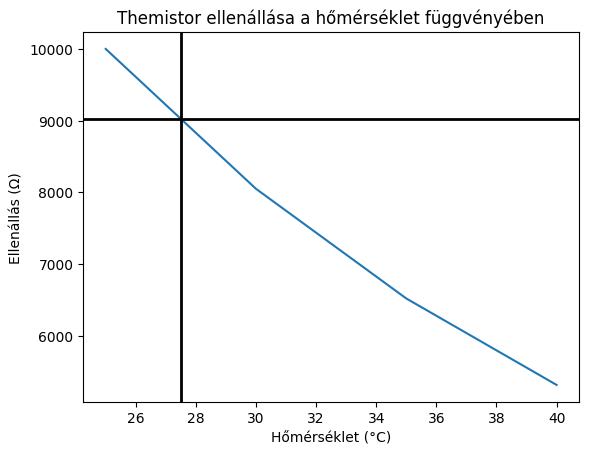

In [8]:
temp = [25,
        30,
        35,
        40]
resistance = [10.00 * 10**3,
              8.048 * 10**3,
              6.518 * 10**3,
              5.312 * 10**3]

plt.plot(temp, resistance, '-')

plt.xlabel('Hőmérséklet (°C)')
plt.ylabel('Ellenállás (Ω)')
plt.title('Themistor ellenállása a hőmérséklet függvényében')

plt.axvline((temp[0] + temp[1]) / 2, color='black', lw=2)
plt.axhline((resistance[0] + resistance[1]) / 2, color='black', lw=2)
plt.yticks()
print(f"Midpoint: {((temp[0] + temp[1]) / 2)}, approximate resistance: {((resistance[0] + resistance[1]) / 2)}")


### Megoldás módja

Látható, hogy körülbelül 9000K ellenállás értéket vesz fel egy emberi kéz hőméréklete körül. 

Tehát ha csinálunk egy referencie 9000K ellenállású ágat, ahol azonos feszültséget küldünk át, mint a
themistoron, és összehasonlítjük az `LM339` chippel, akkor kisebb hőmérsékleten a themistor ága nagyobb lesz
ellenkező esetben kisebb.

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat3.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAPcNZFC8LLww0IaCAAkA8gBU2uaiFxoQGAimI1VUFPBryCa5EjBIYCcrsvxe0hgFsADgwBOAQwAuAV2cM2zxcrIGuo0QTQ0pPBsAEoBKoTaWuHgNKbaZjFxYdrZyWCp6VDQCH4hKmJl2MrhsOz+2aTEZchgEDWQ7ADuzcHZLW1srs2kylV8ymppqJZFlgjz82CkuERYaGiRajCWWJDEBMgkBGBYYLhBCBDTumzd2Vr3FZC3zVhNfcHP3WPIIwGhfy+KjW42BoyeLzG61EBnKAwAkipYdD-nD0sUqC8lJoKvJwQNutjQXjQc8ALKKBD4lI4toqYpsCkk37KfIA6r0kpcMA8FTncAEShoXAQUQQADCkgAMgARNgAc0qIPusPCCpQaDUjQ1hkO6ReDXempA2ueQA)